# **Import Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# **Import Data**

In [2]:
mails = pd.read_csv('/content/mail_data.csv')
mails

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Data-PreProcessing**


In [3]:
mails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
mails['Label'] = mails.Category.replace({'spam': 1, 'ham': 0})
mails.head()

<ipython-input-4-65020645e3d0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mails['Label'] = mails.Category.replace({'spam': 1, 'ham': 0})


,Category,Message,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# **Data Visulization**

<Axes: xlabel='Category'>

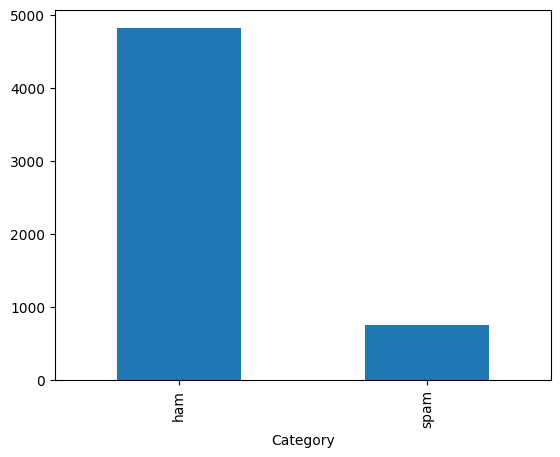

In [5]:
mails['Category'].value_counts().plot(kind='bar')

# **Splitting data to input and output**

In [6]:
x = mails['Message']
y = mails['Label']

In [7]:
x

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [8]:
y

,Label
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


# **Splitting Data for training and testing**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=6)

In [10]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [12]:
# Converting objects in form of neumerical through feature vectorization
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
# feature_extraction = TfidfVectorizer(lowercase=True)  # boolean True without quotes


In [13]:
x_train_feature = feature_extraction.fit_transform(x_train)
x_test_feature = feature_extraction.transform(x_test)

# **Choosing Model**

In [14]:
lr = LogisticRegression()
lr.fit(x_train_feature, y_train)

LogisticRegression()

# **Evaluating Model**

In [15]:
lr_y_pred = lr.predict(x_train_feature)
lr_train_acc = accuracy_score(y_train, lr_y_pred)
print(lr_train_acc)

0.9665694413282477


In [16]:
lr_y_test_pred = lr.predict(x_test_feature)
lr_test_acc = accuracy_score(y_test, lr_y_test_pred)
print(lr_test_acc)

0.9766816143497757


# **Output**


In [17]:
input_data = "Hey, are we still meeting for lunch tomorrow at 1 PM? Let me know!"
input_data_true = feature_extraction.transform([input_data])
lr_input_pred = lr.predict(input_data_true)
# print(lr_input_pred[0])

if(lr_input_pred[0] == 1) :
  print('spam')
else :
  print('ham')

ham
